In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Wczytanie danych
X = pd.read_csv("X_train.csv")
X_t = pd.read_csv("X_test.csv")
y = pd.read_csv("y_train.csv")

# Usunięcie niepotrzebnych kolumn
X = X.drop(["Unnamed: 0"], axis=1)
X_t = X_t.drop(["Unnamed: 0"], axis=1)
y = y.RiskPerformance

# Transformacja klas w y na 0 i 1
y = np.where(y == "Bad", 1, 0)

# Zastępujemy wartości [-7, -8, -9] na Nan
X_not = X.replace([-7, -8, -9], np.nan, inplace=False) 
X_not_test = X_t.replace([-7, -8, -9], np.nan, inplace=False)

# usuwamy wiersze, gdzie są same Nany
mask = ~X_not.isnull().all(axis=1)
X_notnan = X_not[mask]
y_train = y[mask]
X_notnan_test = X_not_test

Zajmijmy się brakami danych z kolumny X9. Bardzo wiele tych braków można uzupełnić 0, ponieważ skoro te osoby nie miały 100 procent braku opóźnień w płatnościach, to tym bardziej minęło 0 miesięcy od ostatniego opóźnienia w płatnościach. Takich wierszy w zbiorze treningowym jest aż 1665.

In [3]:
X_notnan[(X_notnan["X9"].isnull()) & (X_notnan["X8"] == 100)].shape

(1665, 23)

In [4]:
X_notnan.loc[(X_notnan["X8"] == 100) & (X_notnan["X9"].isnull()), "X9"] = 0
X_notnan_test.loc[(X_notnan_test["X8"] == 100) & (X_notnan_test["X9"].isnull()), "X9"] = 0

C:\Users\PC\AppData\Local\Temp\ipykernel_20900\132116613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_notnan.loc[(X_notnan["X8"] == 100) & (X_notnan["X9"].isnull()), "X9"] = 0


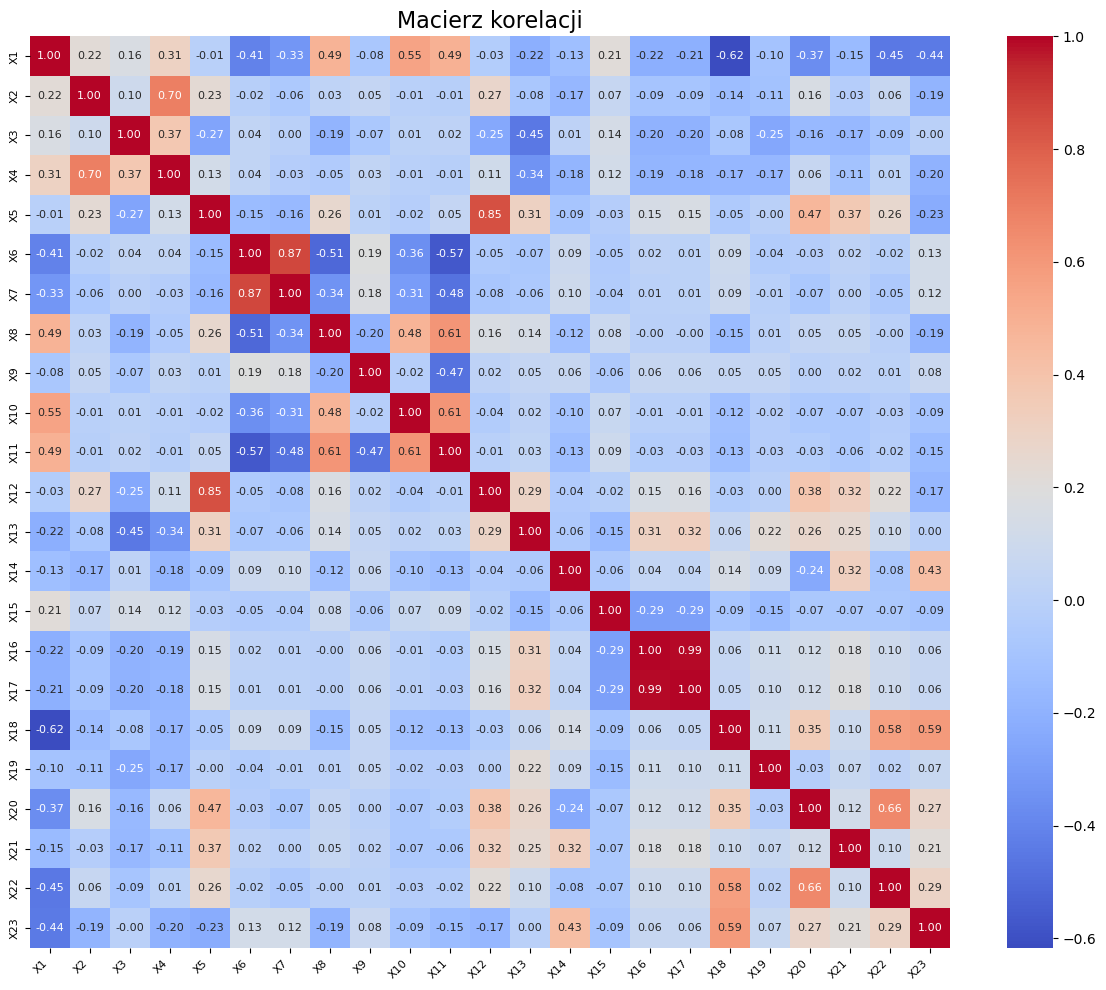

In [6]:
# Obliczanie korelacji i tworzenie wykresu
plt.figure(figsize=(12, 10))  # Dostosuj rozmiar wykresu (szerokość x wysokość w calach)
sns.heatmap(pd.DataFrame(X_notnan_test).corr(), annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 8})
plt.title("Macierz korelacji", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotacja etykiet na osi X
plt.yticks(fontsize=8)  # Rozmiar czcionki etykiet osi Y
plt.tight_layout()  # Zapewnia, że elementy wykresu nie nachodzą na siebie
plt.savefig("macierz_korelacji.png", dpi=300, bbox_inches='tight')
plt.show()

Patrząc na wykres korelacji, widzimy, że kolumny X16 oraz X17 to jest praktycznie to samo. Rzeczywiście opis tych kolumn jest praktycznie taki sam. Odrzucamy X16, bo z opisu wydaje się być rzetelniejsza.

In [15]:
# Usunięcie kolumny X16
X_train = X_notnan.drop(["X16"], axis=1)
X_test = X_notnan_test.drop(["X16"], axis=1)

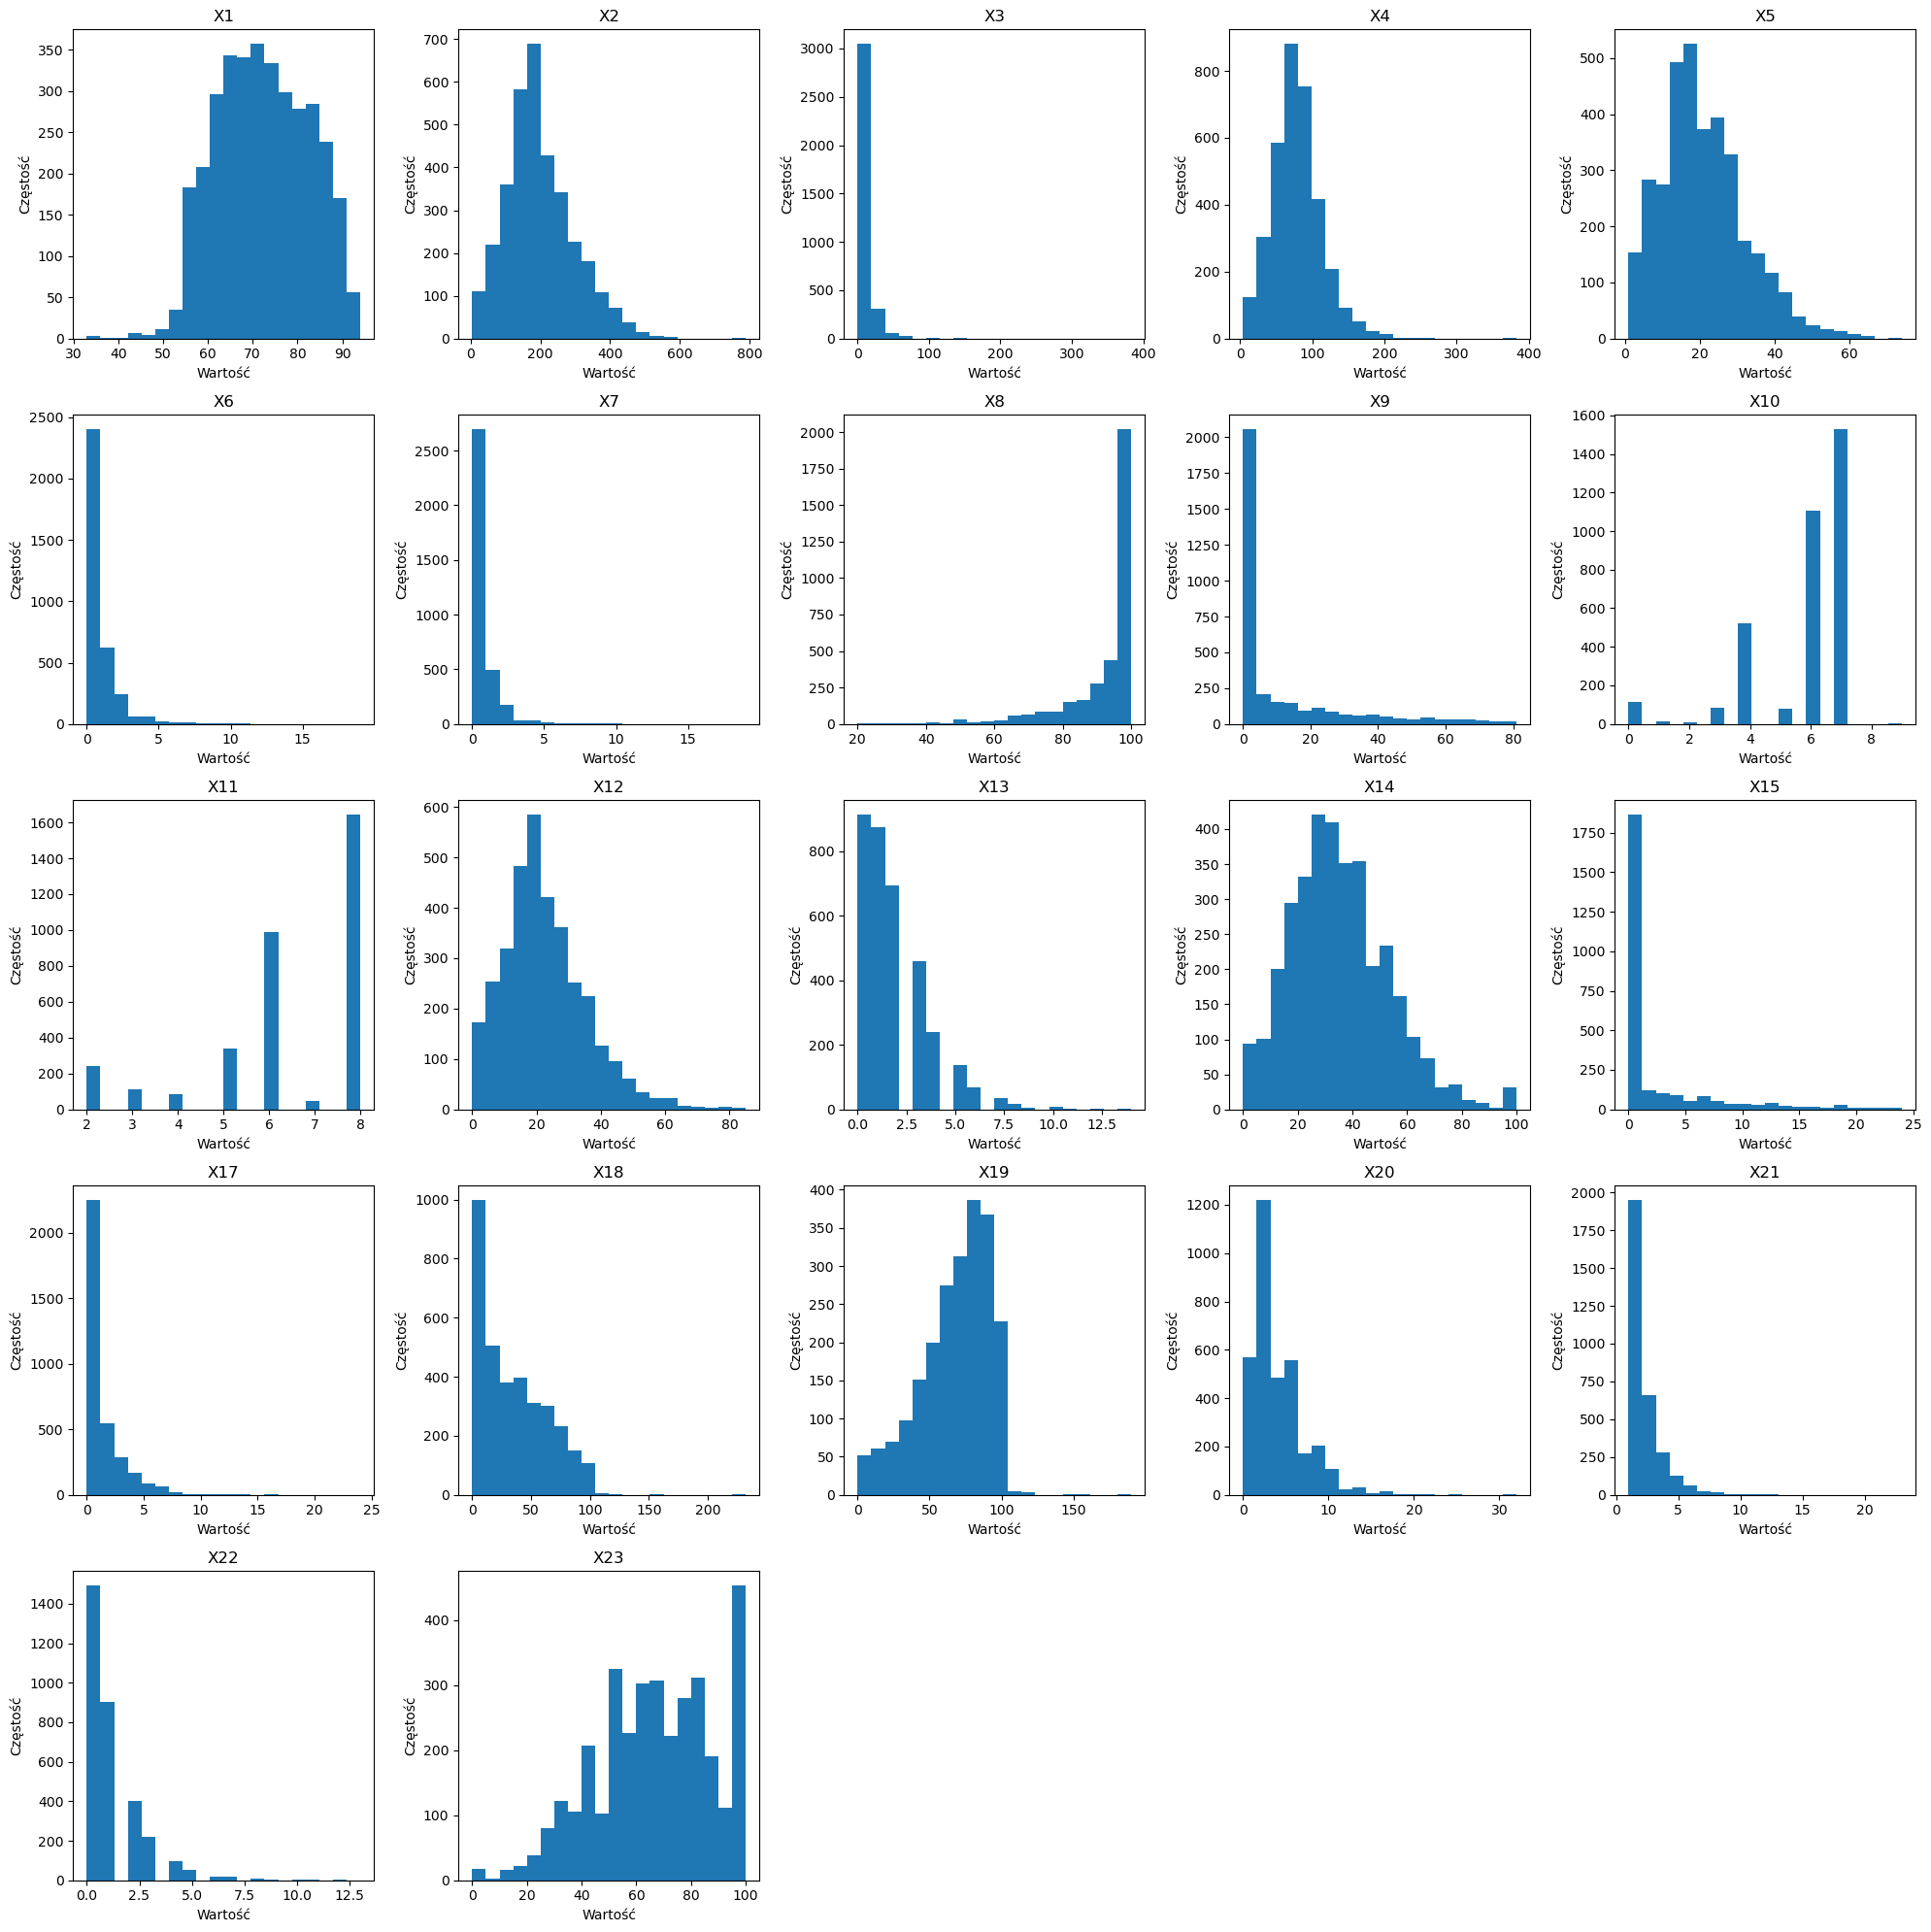

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tworzenie histogramów
num_columns = len(X_train.columns)
cols = 5  # Liczba kolumn w siatce
rows = (num_columns // cols) + (num_columns % cols > 0)  # Automatyczne obliczanie liczby wierszy

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))  # Rozmiar figury zależy od liczby wierszy
axes = axes.flatten()  # Spłaszczenie tablicy osi, aby można było łatwo iterować

# Rysowanie histogramów dla każdej kolumny
for i, column in enumerate(X_train.columns):
    X_train[column].hist(ax=axes[i], bins=20, grid=False)
    axes[i].set_title(column)
    axes[i].set_xlabel("Wartość")
    axes[i].set_ylabel("Częstość")

# Usunięcie pustych osi (jeśli istnieją)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Dopasowanie layoutu
plt.savefig("histogramy_23_kolumn.png", dpi=300)  # Zapisanie wykresu do pliku
plt.show()


In [17]:
# Dodatkowo transformacje zmiennych, żeby ich rozkłady były bardziej normalne

X_train["X4"] = np.log(X_train["X4"] + 0.5)
X_train["X5"] = np.log(X_train["X5"] + 10)
X_train["X6"] = np.log(X_train["X6"] + 1)
X_train["X7"] = np.log(X_train["X7"] + 1)
X_train["X8"] = np.log(X_train["X8"]+ 1)
X_train["X9"] = np.log(X_train["X9"] + 1)
X_train["X10"] = np.log(X_train["X10"] + 1)
X_train["X13"] = np.log(X_train["X13"] + 1)
X_train["X15"] = np.log(X_train["X15"] + 1)
X_train["X17"] = np.log(X_train["X17"] + 1)
X_train["X18"] = np.log(X_train["X18"] + 1)
X_train["X20"] = np.log(X_train["X20"] + 1)
X_train["X21"] = np.log(X_train["X21"] + 0.1)
X_train["X22"] = np.log(X_train["X22"] + 0.1)

X_test["X4"] = np.log(X_test["X4"] + 0.5)
X_test["X5"] = np.log(X_test["X5"] + 10)
X_test["X6"] = np.log(X_test["X6"] + 1)
X_test["X7"] = np.log(X_test["X7"] + 1)
X_test["X8"] = np.log(X_test["X8"] + 1)
X_test["X9"] = np.log(X_test["X9"] + 1)
X_test["X10"] = np.log(X_test["X10"] + 1)
X_test["X13"] = np.log(X_test["X13"] + 1)
X_test["X15"] = np.log(X_test["X15"] + 1)
X_test["X17"] = np.log(X_test["X17"] + 1)
X_test["X18"] = np.log(X_test["X18"] + 1)
X_test["X20"] = np.log(X_test["X20"] + 1)
X_test["X21"] = np.log(X_test["X21"] + 0.1)
X_test["X22"] = np.log(X_test["X22"] + 0.1)

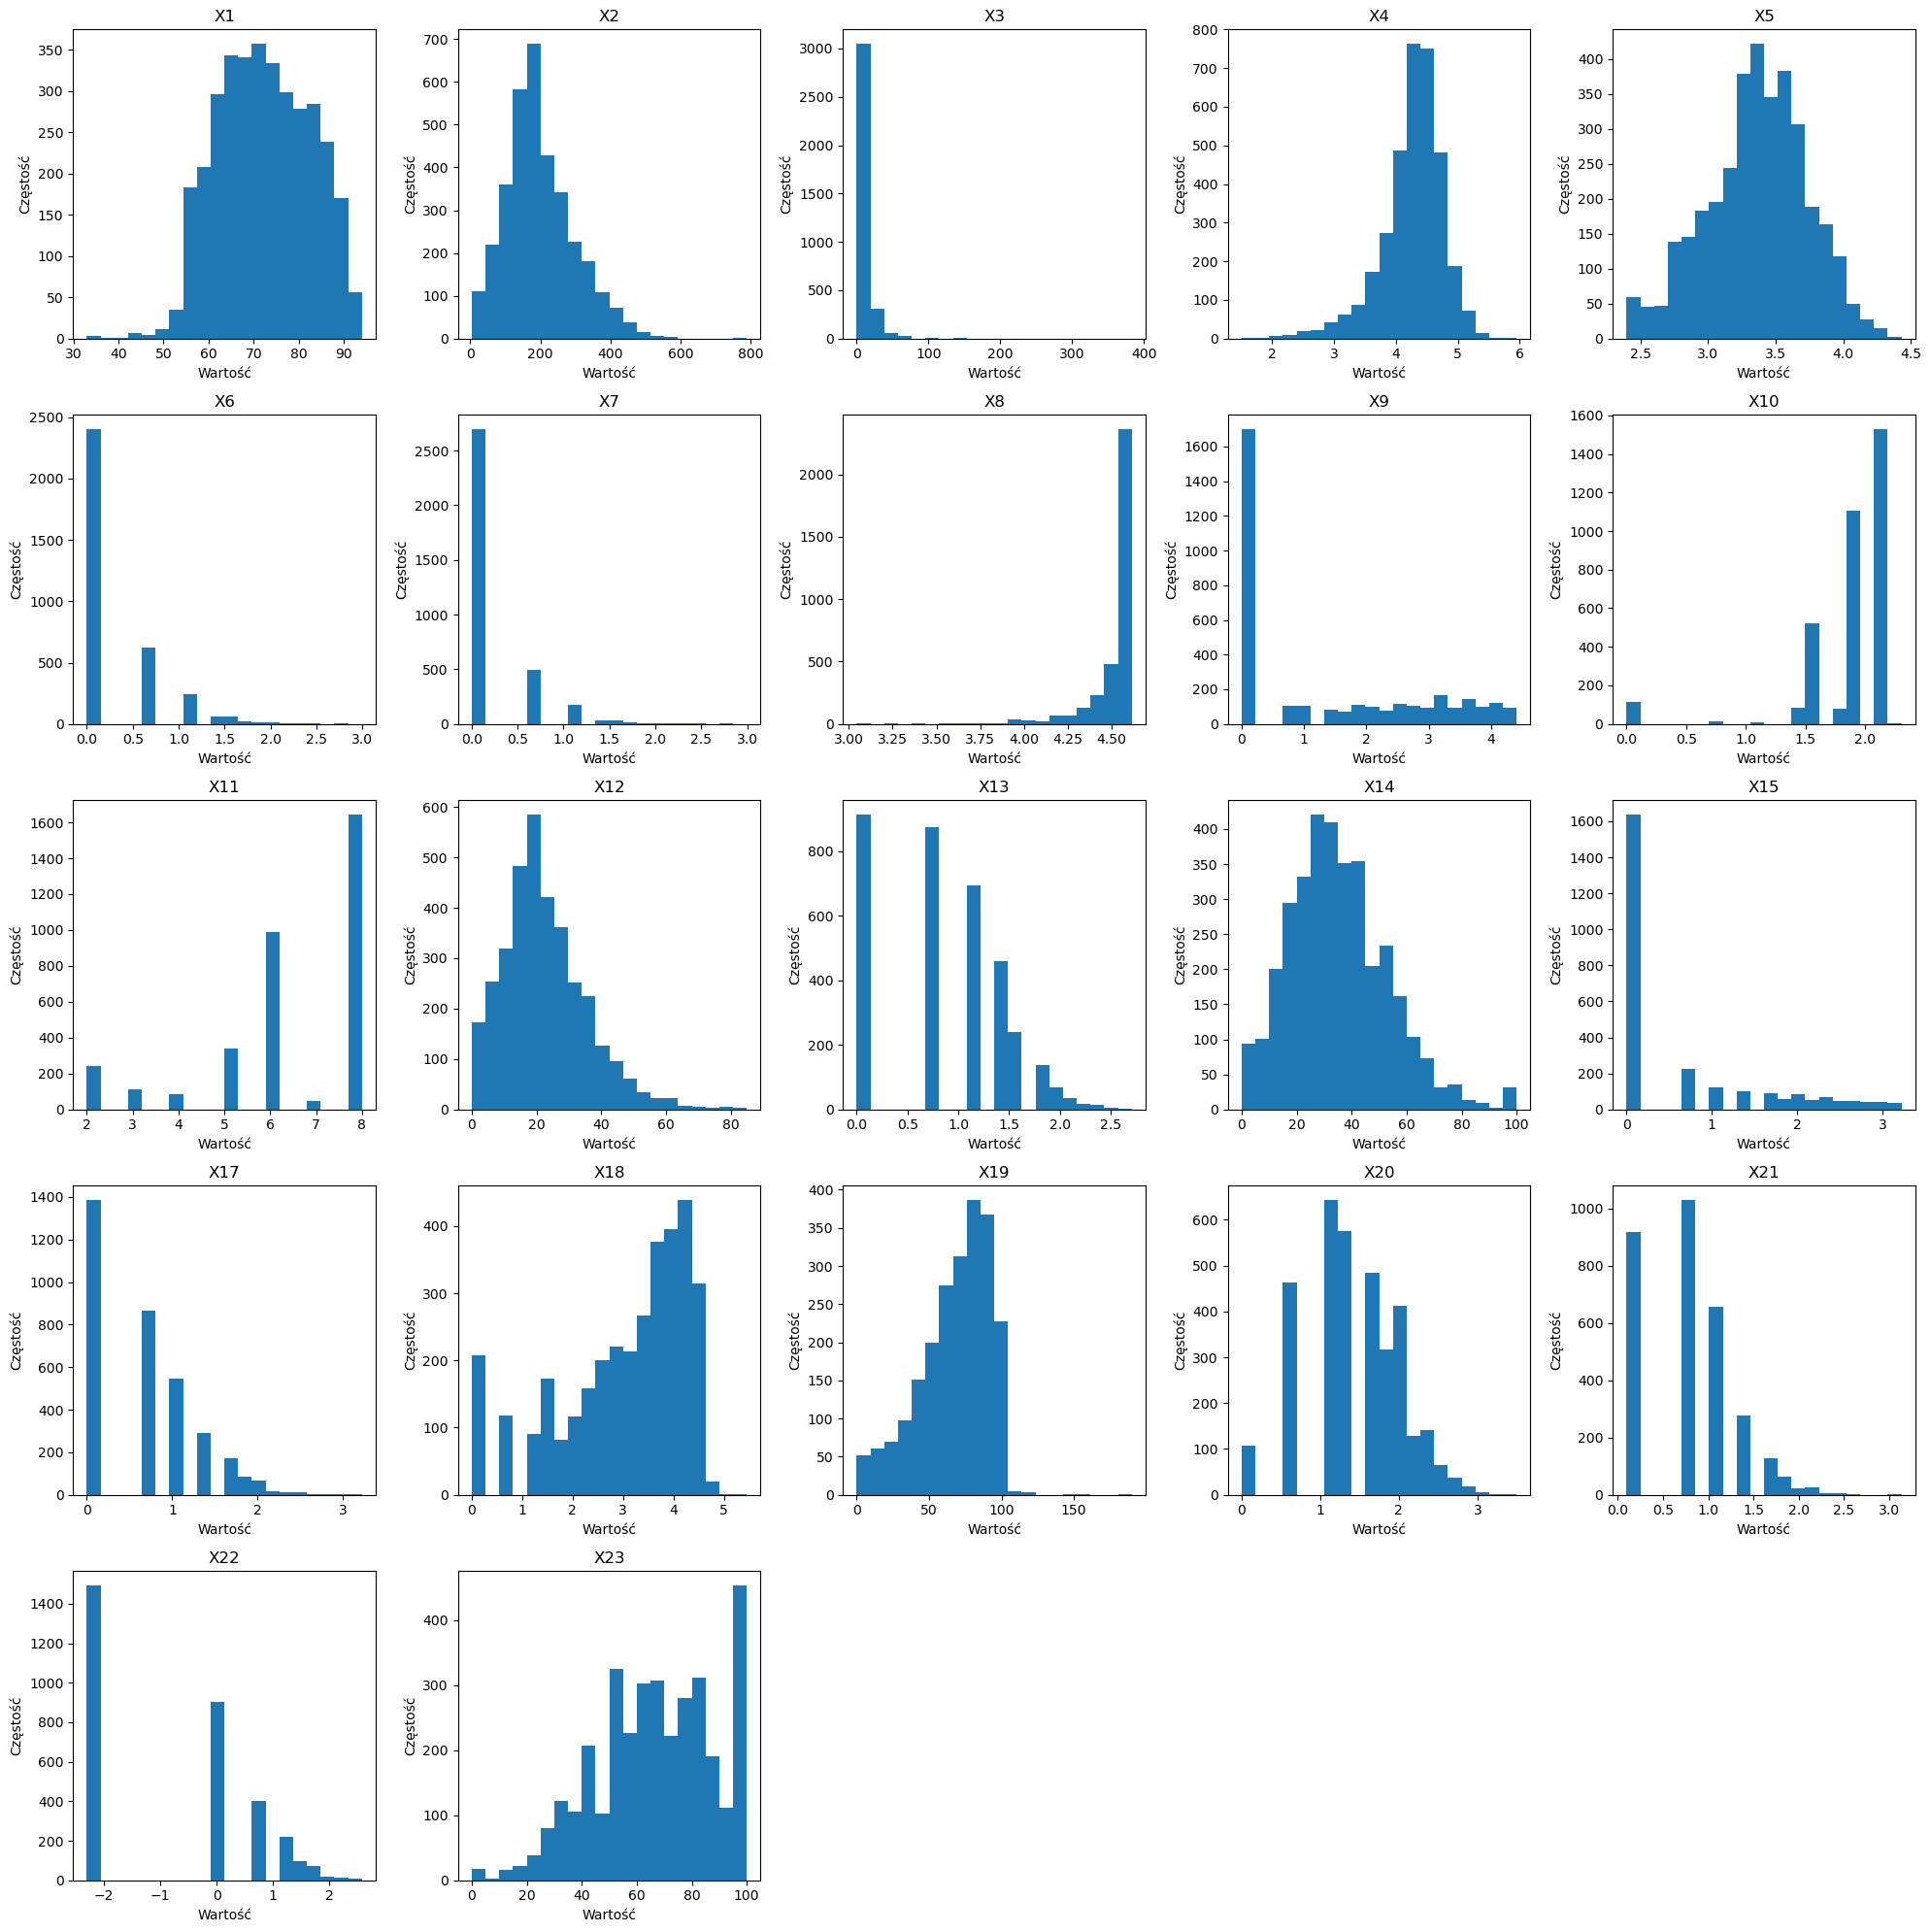

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tworzenie histogramów
num_columns = len(X_train.columns)
cols = 5  # Liczba kolumn w siatce
rows = (num_columns // cols) + (num_columns % cols > 0)  # Automatyczne obliczanie liczby wierszy

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))  # Rozmiar figury zależy od liczby wierszy
axes = axes.flatten()  # Spłaszczenie tablicy osi, aby można było łatwo iterować

# Rysowanie histogramów dla każdej kolumny
for i, column in enumerate(X_train.columns):
    X_train[column].hist(ax=axes[i], bins=20, grid=False)
    axes[i].set_title(column)
    axes[i].set_xlabel("Wartość")
    axes[i].set_ylabel("Częstość")

# Usunięcie pustych osi (jeśli istnieją)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Dopasowanie layoutu
plt.savefig("histogramy_22_kolumn.png", dpi=300)  # Zapisanie wykresu do pliku
plt.show()


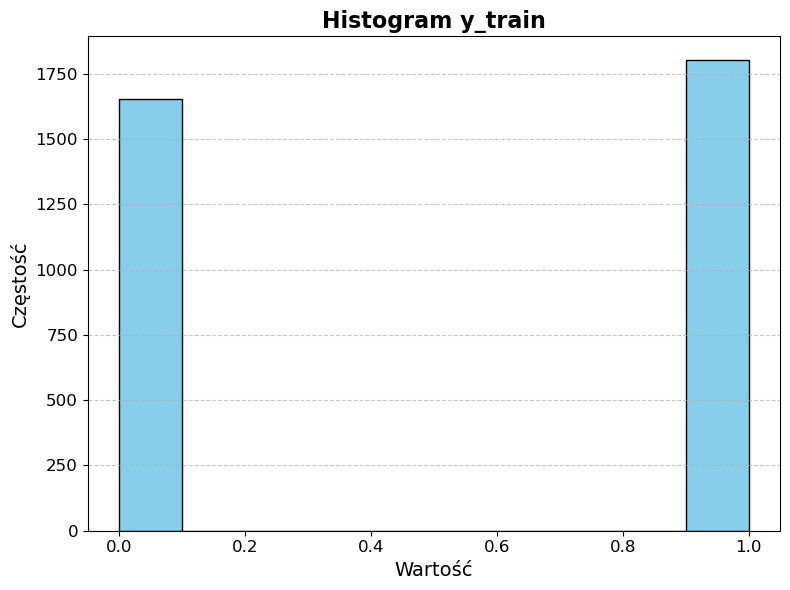

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Przykładowe dane y_train
import numpy as np

# Tworzenie DataFrame
y_train_df = pd.DataFrame(y_train, columns=['y_train'])

# Rysowanie histogramu
plt.figure(figsize=(8, 6))  # Ustawienie rozmiaru wykresu
y_train_df['y_train'].hist(bins=10, color='skyblue', edgecolor='black', grid=False)

# Dodanie tytułu i etykiet
plt.title("Histogram y_train", fontsize=16, fontweight='bold')
plt.xlabel("Wartość", fontsize=14)
plt.ylabel("Częstość", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Dodanie siatki (opcjonalne)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Zapisanie wykresu do pliku
plt.tight_layout()  # Dopasowanie layoutu
plt.savefig("histogram_y_train.png", dpi=300)
plt.show()

Widzimy, że rozkład y jest w miarę równomierny.

In [118]:
from sklearn.metrics import make_scorer, balanced_accuracy_score

# Tworzymy sobie metrykę względem której będziemy optymalizować
scoring = make_scorer(balanced_accuracy_score)

In [119]:
# Pobieramy ogólne biblioteki, które będą nam towarzyszyć

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [73]:
modele = []
bal_acc_mean = []
bal_acc_std = []

**REGRESJA LOGISTYCZNA**

In [64]:
from sklearn.linear_model import LogisticRegression

pipeline_lr = Pipeline([
    ('inputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('lm', LogisticRegression())
])

param_grid_lr = [
    {
        # Hiperparametry KNNImputer
        'inputer__n_neighbors': [3, 5, 7],
        
        # Hiperparametry LogisticRegression
        "lm__C" : np.linspace(0.001, 10, 100),
        "lm__max_iter" : [150, 300]
    }
]

# Definiowanie GridSearchCV
grid_search_lr = GridSearchCV(
    pipeline_lr,
    param_grid_lr,
    cv=5,               # 5-krotna walidacja krzyżowa
    scoring=scoring,    # Balanced accuracy jako metryka oceny
    refit = True,
    n_jobs=-1,          # Wykorzystanie wielu rdzeni CPU
    verbose=2           # Szczegółowość logów
)

grid_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('inputer', KNNImputer()),
                                       ('scaler', StandardScaler()),
                                       ('lm', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'inputer__n_neighbors': [3, 5, 7],
                          'lm__C': array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e+00, 1.51...
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 8.283e+00, 8.384e+00,
       8.485e+00, 8.586e+00, 8.687e+00, 8.788e+00, 8.889e+00, 8.990e+00,
       9.091e+00, 9.192e+00, 9.293e+00, 9.394e+00, 9.495e+00, 9.596e+00,
       9.697e+00, 9.798e+00, 9.899e+00, 1.000e+01]),
                          'lm__max_iter': [150, 300]}],
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=2)

In [74]:
print("Best Parameters:", grid_search_lr.best_params_)

best_index = grid_search_lr.best_index_
results = grid_search_lr.cv_results_
mean = results['mean_test_score'][best_index]
std = results['std_test_score'][best_index]

modele.append("Logistic Regression")
bal_acc_mean.append(round(mean, 3))
bal_acc_std.append(round(std, 3))

print(mean)
print(std)

Best Parameters: {'inputer__n_neighbors': 5, 'lm__C': 0.10200000000000001, 'lm__max_iter': 150}
0.7370097955054982
0.010092581583176953


**Gradient Boosting**

**Defaultowe parametry**

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

pipeline_gb_default = Pipeline([
    ('inputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('lm', GradientBoostingClassifier())
])

scores = cross_val_score(pipeline_gb_default, X_train, y_train, cv=3, scoring=scoring)

print(f"Wyniki walidacji krzyżowej: {scores}")
print(f"Średnia dokładność: {scores.mean():.3f}")
print(f"Odchylenie standardowe: {scores.std():.3f}")

Wyniki walidacji krzyżowej: [0.74208326 0.71640732 0.73099885]
Średnia dokładność: 0.730
Odchylenie standardowe: 0.011


**Najlepsze parametry**

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

pipeline_gb = Pipeline([
    ('inputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier())
])

param_grid_gb = {
    # Hiperparametry GradientBoostingClassifier
    'gb__n_estimators': [50, 100, 200],
    'gb__learning_rate': np.linspace(0.005, 2, 30),
    'gb__max_depth': [3, 5, 7, 9],
    'gb__max_features': ['sqrt', 'log2'],
    'gb__subsample': [0.8, 1.0]
}

grid_search_gb = GridSearchCV(
    pipeline_gb,
    param_grid_gb,
    cv=3,               # 3-krotna walidacja krzyżowa
    scoring=scoring,    # Balanced accuracy jako metryka oceny
    refit = True,
    n_jobs=-1,
    verbose=2
)

# Dopasowanie modelu
grid_search_gb.fit(X_train, y_train)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('inputer', KNNImputer()),
                                       ('scaler', StandardScaler()),
                                       ('gb', GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gb__learning_rate': array([0.005     , 0.0737931 , 0.14258621, 0.21137931, 0.28017241,
       0.34896552, 0.41775862, 0.48655172, 0.55534483, 0.62413793,
       0.69293103, 0.76172414, 0.83051724, 0.89931034, 0.96810345,
       1.03689655, 1.10568966, 1.17448276, 1.24327586, 1.31206897,
       1.38086207, 1.44965517, 1.51844828, 1.58724138, 1.65603448,
       1.72482759, 1.79362069, 1.86241379, 1.9312069 , 2.        ]),
                         'gb__max_depth': [3, 5, 7, 9],
                         'gb__max_features': ['sqrt', 'log2'],
                         'gb__n_estimators': [50, 100, 200],
                         'gb__subsample': [0.8, 1.0]},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=2)

In [75]:
# Wyniki GradientBoost z GridSearchCV

print("Best Parameters:", grid_search_gb.best_params_)

best_index = grid_search_gb.best_index_
results = grid_search_gb.cv_results_
mean = results['mean_test_score'][best_index]
std = results['std_test_score'][best_index]

modele.append("Gradient Boosting")
bal_acc_mean.append(round(mean, 3))
bal_acc_std.append(round(std, 3))

print(mean)
print(std)

Best Parameters: {'gb__learning_rate': 0.07379310344827587, 'gb__max_depth': 3, 'gb__max_features': 'sqrt', 'gb__n_estimators': 100, 'gb__subsample': 1.0}
0.7394346484105859
0.007915005403416137


**Random Forest**

In [23]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('inputer', KNNImputer(n_neighbors = 5)),
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])

params_rf = {
    'rf__n_estimators': [50, 75, 100, 200],             # Liczba drzew
    'rf__max_depth': [3, 5, 7],                         # Maksymalna głębokość drzewa
    'rf__min_samples_split': [8, 12, 18],               # Minimalna liczba próbek do podziału    # Liczba cech do rozważenia przy podziale
    'rf__class_weight': [None, 'balanced'],             # Zbalansowanie wag klas
    'rf__bootstrap': [True, False],
}

grid_pipeline_rf = GridSearchCV(estimator = pipeline_rf,
                             cv = 4,
                             scoring=scoring,
                             refit = True,
                             param_grid = params_rf,
                             n_jobs=-1,
                             verbose=2
                             )

grid_pipeline_rf.fit(X_train, y_train)

Fitting 4 folds for each of 144 candidates, totalling 576 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('inputer', KNNImputer()),
                                       ('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__bootstrap': [True, False],
                         'rf__class_weight': [None, 'balanced'],
                         'rf__max_depth': [3, 5, 7],
                         'rf__min_samples_split': [8, 12, 18],
                         'rf__n_estimators': [50, 75, 100, 200]},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=2)

In [76]:
# Wyniki RandomForest z GridSearchCV

print("Best Parameters:", grid_pipeline_rf.best_params_)

best_index = grid_pipeline_rf.best_index_
results = grid_pipeline_rf.cv_results_
mean = results['mean_test_score'][best_index]
std = results['std_test_score'][best_index]

modele.append("Random Forest")
bal_acc_mean.append(round(mean, 3))
bal_acc_std.append(round(std, 3))

print(mean)
print(std)

Best Parameters: {'rf__bootstrap': True, 'rf__class_weight': None, 'rf__max_depth': 5, 'rf__min_samples_split': 12, 'rf__n_estimators': 50}
0.7394006263441171
0.014324429347267884


**Bagging KNN**

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

pipeline_knn = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('bagging', BaggingClassifier(estimator = KNeighborsClassifier(), 
                                  n_estimators = 30))
])

params_KNN = {
    # Hiperparametry KNNImputer
    'imputer__n_neighbors': [3, 5, 7, 9],

    # Hiperparametry BaggingClassifier
    'bagging__estimator__n_neighbors': [3, 5, 7, 9],
    'bagging__n_estimators': [5, 10, 20, 30, 50]
    }

grid_pipeline_knn = GridSearchCV(pipeline_knn,
                            cv = 5,
                            param_grid = params_KNN,
                            scoring=scoring,
                            refit = True,
                            n_jobs=-1,
                            verbose=2
                        )

grid_pipeline_knn.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', KNNImputer()),
                                       ('scaler', StandardScaler()),
                                       ('bagging',
                                        BaggingClassifier(estimator=KNeighborsClassifier(),
                                                          n_estimators=30))]),
             n_jobs=-1,
             param_grid={'bagging__estimator__n_neighbors': [3, 5, 7, 9],
                         'bagging__n_estimators': [5, 10, 20, 30, 50],
                         'imputer__n_neighbors': [3, 5, 7, 9]},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=2)

In [77]:
# Wyniki Bagging KNN z GridSearchCV

print("Best Parameters:", grid_pipeline_knn.best_params_)

best_index = grid_pipeline_knn.best_index_
results = grid_pipeline_knn.cv_results_
mean = results['mean_test_score'][best_index]
std = results['std_test_score'][best_index]

modele.append("Bagging KNN")
bal_acc_mean.append(round(mean, 3))
bal_acc_std.append(round(std, 3))

print(mean)
print(std)

Best Parameters: {'bagging__estimator__n_neighbors': 9, 'bagging__n_estimators': 30, 'imputer__n_neighbors': 5}
0.7012684337242254
0.012900872480372668


Sprawdźmy SimpleImputer

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

pipeline_knn_default = Pipeline([
    ('inputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('bagging', BaggingClassifier(estimator = KNeighborsClassifier(n_neighbors = 9), n_estimators = 30))
])

scores = cross_val_score(pipeline_knn_default, X_train, y_train, cv=5, scoring=scoring)

print(f"Wyniki walidacji krzyżowej: {scores}")
print(f"Średnia dokładność: {scores.mean():.3f}")
print(f"Odchylenie standardowe: {scores.std():.3f}")

Wyniki walidacji krzyżowej: [0.73511394 0.68853303 0.69958868 0.69019978 0.70245049]
Średnia dokładność: 0.703
Odchylenie standardowe: 0.017


**Extra Tree**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

pipeline_extra = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('extratrees', ExtraTreesClassifier())
])

params_extra = {
    'extratrees__n_estimators': [50, 75, 100, 150],          # Liczba drzew
    'extratrees__max_depth': [3, 5, 7],                      # Maksymalna głębokość drzewa
    'extratrees__min_samples_split': [10, 15, 19],           # Minimalna liczba próbek do podziału
    'extratrees__bootstrap': [True, False]
}

grid_search_extra = GridSearchCV(
    pipeline_extra,
    param_grid = params_extra,
    cv=4,                   # 4-krotna walidacja krzyżowa
    scoring=scoring,        # Balanced accuracy jako metryka oceny,
    refit = True,
    n_jobs=-1, 
    verbose=2  
)

# Dopasowanie modelu 
grid_search_extra.fit(X_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('imputer', KNNImputer()),
                                       ('scaler', StandardScaler()),
                                       ('extratrees', ExtraTreesClassifier())]),
             n_jobs=-1,
             param_grid={'extratrees__bootstrap': [True, False],
                         'extratrees__max_depth': [3, 5, 7],
                         'extratrees__min_samples_split': [10, 15, 19],
                         'extratrees__n_estimators': [50, 75, 100, 150]},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=2)

In [78]:
# Wyniki Extra Tree z GridSearchCV

print("Best Parameters:", grid_search_extra.best_params_)
print("Best Custom Score:", grid_search_extra.best_score_)

best_index = grid_search_extra.best_index_
results = grid_search_extra.cv_results_
mean = results['mean_test_score'][best_index]
std = results['std_test_score'][best_index]

modele.append("Extra Tree")
bal_acc_mean.append(round(mean, 3))
bal_acc_std.append(round(std, 3))

print(mean)
print(std)

Best Parameters: {'extratrees__bootstrap': False, 'extratrees__max_depth': 7, 'extratrees__min_samples_split': 15, 'extratrees__n_estimators': 150}
Best Custom Score: 0.7300230459548898
0.7300230459548898
0.013999096489711083


**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

pipeline_svm = Pipeline([('imputer', SimpleImputer()),
                        ('scaler', StandardScaler()),
                        ('selector', SelectFromModel(LogisticRegression())),
                        ('svm', SVC())
                        ])

param_grid_svm = {
    'selector__estimator__C': [0.1, 0.5, 1],
    'selector__max_features': [5, 8, 12, 18],
    'svm__C': [0.01, 0.1, 0.2, 0.5, 0.7, 1, 3, 6, 10, 100],  # Regularyzacja
}

grid_search_svm = GridSearchCV(
    pipeline_svm,
    param_grid = param_grid_svm,
    cv=3,                   # 3-krotna walidacja krzyżowa
    scoring=scoring,        # Balanced accuracy jako metryka oceny,
    refit = True,
    n_jobs=-1, 
    verbose=2  
)

# Dopasowanie modelu
grid_search_svm.fit(X_train, y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('selector',
                                        SelectFromModel(estimator=LogisticRegression(),
                                                        max_features=5)),
                                       ('svm', SVC())]),
             n_jobs=-1,
             param_grid={'selector__estimator__C': [0.1, 0.5, 1],
                         'selector__max_features': [5, 8, 12, 18],
                         'svm__C': [0.01, 0.1, 0.2, 0.5, 0.7, 1, 3, 6, 10,
                                    100]},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=2)

In [79]:
# Wyniki SVM z selekcją cech z GridSearchCV

print("Best Parameters:", grid_search_svm.best_params_)

best_index = grid_search_svm.best_index_
results = grid_search_svm.cv_results_
mean = results['mean_test_score'][best_index]
std = results['std_test_score'][best_index]

modele.append("SVM z selekcją cech")
bal_acc_mean.append(round(mean, 3))
bal_acc_std.append(round(std, 3))

print(mean)
print(std)

Best Parameters: {'selector__estimator__C': 0.1, 'selector__max_features': 5, 'svm__C': 1}
0.7349949203816122
0.008078032441501343


**VOTING**

In [82]:
# Przygotowanie do modelu VotingClassifier

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

pipeline_extra = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', StandardScaler()),
    ('extratrees', ExtraTreesClassifier(bootstrap=False, max_depth = 7, min_samples_split = 15, n_estimators = 150))
])

pipeline_svm = Pipeline([('imputer', SimpleImputer()),
                        ('scaler', StandardScaler()),
                        ('selector', SelectFromModel(LogisticRegression(C = 0.1), max_features = 5)),
                        ('svm', SVC(C = 1, probability = True))
                        ])

pipeline_knn_default = Pipeline([
    ('inputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('bagging', BaggingClassifier(estimator = KNeighborsClassifier(n_neighbors = 9), n_estimators = 30))
])

estimators = [('extratree', pipeline_extra),
              ('svm', pipeline_svm),
              ('bagging_knn', pipeline_knn_default),
              ]


In [83]:
# Soft voting
voting_clf_soft = VotingClassifier(
    estimators=estimators,
    voting='soft'
)

# Wyniki soft voting
scores = cross_val_score(voting_clf_soft, X_train, y_train, cv=5, scoring=scoring)

print(f"Wyniki walidacji krzyżowej: {scores}")
print(f"Średnia dokładność: {scores.mean():.3f}")
print(f"Odchylenie standardowe: {scores.std():.3f}")

modele.append("Soft Voting")
bal_acc_mean.append(round(scores.mean(), 3))
bal_acc_std.append(round(scores.std(), 3))

Wyniki walidacji krzyżowej: [0.75475559 0.71447222 0.7283304  0.72508604 0.71470712]
Średnia dokładność: 0.727
Odchylenie standardowe: 0.015


In [84]:
#Hard voting
voting_clf_hard = VotingClassifier(
    estimators=estimators,
    voting='hard'
)

# Wyniki hard voting
scores = cross_val_score(voting_clf_hard, X_train, y_train, cv=5, scoring=scoring)

print(f"Wyniki walidacji krzyżowej: {scores}")
print(f"Średnia dokładność: {scores.mean():.3f}")
print(f"Odchylenie standardowe: {scores.std():.3f}")

modele.append("Hard Voting")
bal_acc_mean.append(round(scores.mean(), 3))
bal_acc_std.append(round(scores.std(), 3))

Wyniki walidacji krzyżowej: [0.74745378 0.70717041 0.7300596  0.72950139 0.70691088]
Średnia dokładność: 0.724
Odchylenie standardowe: 0.015


**Stacking Classifier**

In [71]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


estimators = [
              ('rf', RandomForestClassifier(n_estimators = 50, max_depth=5, min_samples_split=12, class_weight = "balanced", bootstrap = True)),
              ('lr', LogisticRegression(C = 0.1, max_iter = 150))
              ]

stacking_pipeline = Pipeline([('imputer', SimpleImputer()),
                        ('scaler', StandardScaler()),
                        ('model', StackingClassifier(estimators=estimators, final_estimator=GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=300, subsample=0.8, min_samples_split=100)))
                        ])


param_grid_stack = {
    'model__final_estimator__learning_rate': [0.005, 0.01, 0.1, 0.2, 0.5, 0.7, 1, 3, 10], 
    'model__final_estimator__max_depth': [3, 5, 7], 
    'model__final_estimator__n_estimators': [50, 75, 100, 150], 
    'model__final_estimator__min_samples_split': [8, 15, 20],
    'model__final_estimator__subsample': [0.8, 1]
}

grid_search_stack = GridSearchCV(
    stacking_pipeline,
    param_grid = param_grid_stack,
    cv=3,                   # 3-krotna walidacja krzyżowa
    scoring=scoring,        # Balanced accuracy jako metryka oceny,
    refit = True,
    n_jobs=-1, 
    verbose=2  
)

# Dopasowanie modelu 
grid_search_stack.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        StackingClassifier(estimators=[('rf',
                                                                        RandomForestClassifier(class_weight='balanced',
                                                                                               max_depth=5,
                                                                                               min_samples_split=12,
                                                                                               n_estimators=50)),
                                                                       ('lr',
                                                                        LogisticRegression(C=0.1,
                                                                                           max_iter=150))],
                                                           final_estimator=GradientBoostingClassifier(learning_rate=0....
             param_grid={'model__final_estimator__learning_rate': [0.005, 0.01,
                                                                   0.1, 0.2,
                                                                   0.5, 0.7, 1,
                                                                   3, 10],
                         'model__final_estimator__max_depth': [3, 5, 7],
                         'model__final_estimator__min_samples_split': [8, 15,
                                                                       20],
                         'model__final_estimator__n_estimators': [50, 75, 100,
                                                                  150],
                         'model__final_estimator__subsample': [0.8, 1]},
             scoring=make_scorer(balanced_accuracy_score, response_method='predict'),
             verbose=2)

In [85]:
# Wyniki StackingClassifier z selekcją cech z GridSearchCV

print("Best Parameters:", grid_search_stack.best_params_)

best_index = grid_search_stack.best_index_
results = grid_search_stack.cv_results_
mean = results['mean_test_score'][best_index]
std = results['std_test_score'][best_index]

modele.append("Stacking Classifier")
bal_acc_mean.append(round(mean, 3))
bal_acc_std.append(round(std, 3))

print(mean)
print(std)

Best Parameters: {'model__final_estimator__learning_rate': 0.1, 'model__final_estimator__max_depth': 3, 'model__final_estimator__min_samples_split': 15, 'model__final_estimator__n_estimators': 50, 'model__final_estimator__subsample': 0.8}
0.740094502528653
0.005947724538882775


**PODSUMOWANIE NA WYKRESIE**

C:\Users\PC\AppData\Local\Temp\ipykernel_22468\2061383201.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


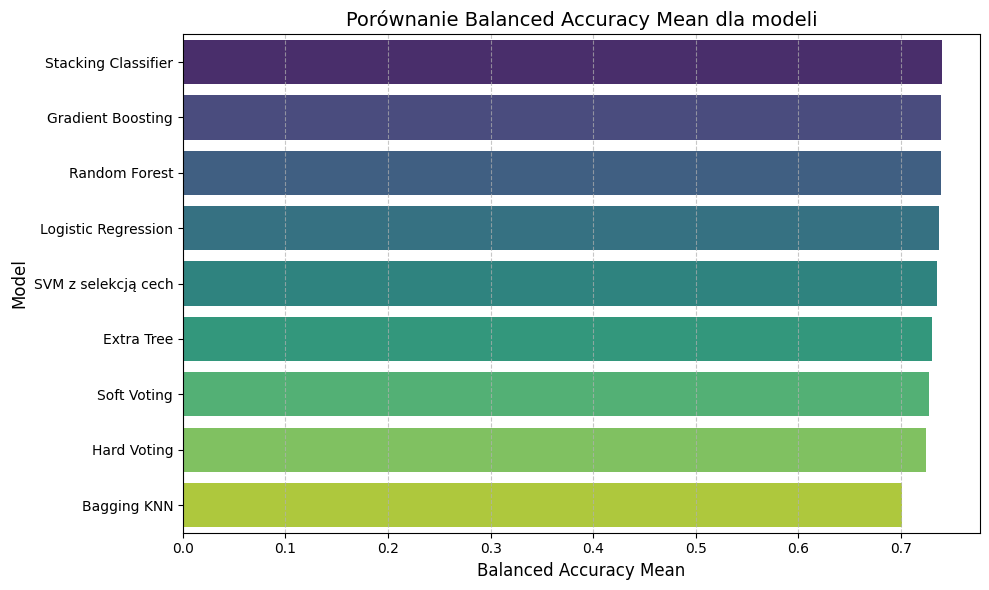

In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Tworzenie DataFrame
models_df = pd.DataFrame({'Model' : modele,
                        'Balanced Accuracy Mean' : bal_acc_mean,
                        'Balanced Accuracy Std' : bal_acc_std})

# Sortowanie malejące według średniej
models_df = models_df.sort_values(by="Balanced Accuracy Mean", ascending=False)

# Wykres barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=models_df,
    x="Balanced Accuracy Mean",
    y="Model",
    palette="viridis"
)

# Dodanie etykiet i tytułu
plt.title("Porównanie Balanced Accuracy Mean dla modeli", fontsize=14)
plt.xlabel("Balanced Accuracy Mean", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.savefig("barplot.jpg", format="jpg", dpi=300, bbox_inches="tight")
# Wyświetlenie wykresu
plt.tight_layout()
plt.show()


In [124]:
plt.savefig("barplot.jpg", format="jpg", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>

In [120]:
pred_gb = grid_search_gb.predict_proba(X_test)
np.savetxt('prawdopodobienstwa_gb.txt', pred_gb[:, 1], delimiter = ",", fmt='%.6f')

pred_svm = grid_search_stack.predict_proba(X_test)
np.savetxt('prawdopodobienstwa_svm.txt', pred_svm[:, 1], delimiter = ",", fmt='%.6f')

pred_stack = grid_search_stack.predict_proba(X_test)
np.savetxt('prawdopodobienstwa_stack.txt', pred_stack[:, 1], delimiter = ",", fmt='%.6f')


C:\Users\PC\AppData\Local\Temp\ipykernel_20900\584615748.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


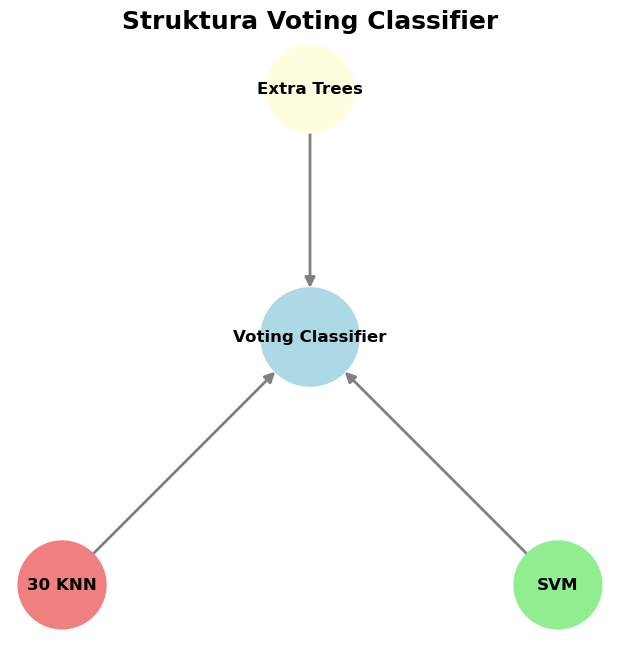

In [33]:
import matplotlib.pyplot as plt
import networkx as nx

# Tworzenie grafu
G = nx.DiGraph()

# Dodanie węzłów
G.add_node("Voting Classifier", style="filled", fillcolor="lightblue", shape="box")
G.add_node("SVM", style="filled", fillcolor="lightgreen", shape="ellipse")
G.add_node("Extra Trees", style="filled", fillcolor="lightyellow", shape="ellipse")
G.add_node("30 KNN", style="filled", fillcolor="lightcoral", shape="ellipse")

# Dodanie krawędzi
G.add_edges_from([
    ("SVM", "Voting Classifier"),
    ("Extra Trees", "Voting Classifier"),
    ("30 KNN", "Voting Classifier")
])

# Ręczne ustawienie pozycji węzłów (bardzo blisko środka)
pos = {
    "30 KNN": (-0.3, 0.5),
    "Extra Trees": (0, 0.7),
    "SVM": (0.3, 0.5),
    "Voting Classifier": (0, 0.6)
}

# Rysowanie grafu
plt.figure(figsize=(6, 6))
nx.draw(
    G, pos, with_labels=True, 
    node_color=['lightblue', 'lightgreen', 'lightyellow', 'lightcoral'],
    node_size=[5000 if node == "Voting Classifier" else 4000 for node in G.nodes()],  # Większy Voting Classifier
    font_size=12, font_weight='bold', font_color="black", edge_color='gray', 
    arrowsize=15,  # Rozmiar strzałek
    width=2  # Grubość krawędzi
)

# Dodanie tytułu
plt.title("Struktura Voting Classifier", fontsize=18, fontweight='bold')
plt.tight_layout()

# Zapisanie wykresu
plt.savefig("voting_classifier_structure_shortest_edges.png", dpi=300)
plt.show()


C:\Users\PC\AppData\Local\Temp\ipykernel_20900\452044151.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


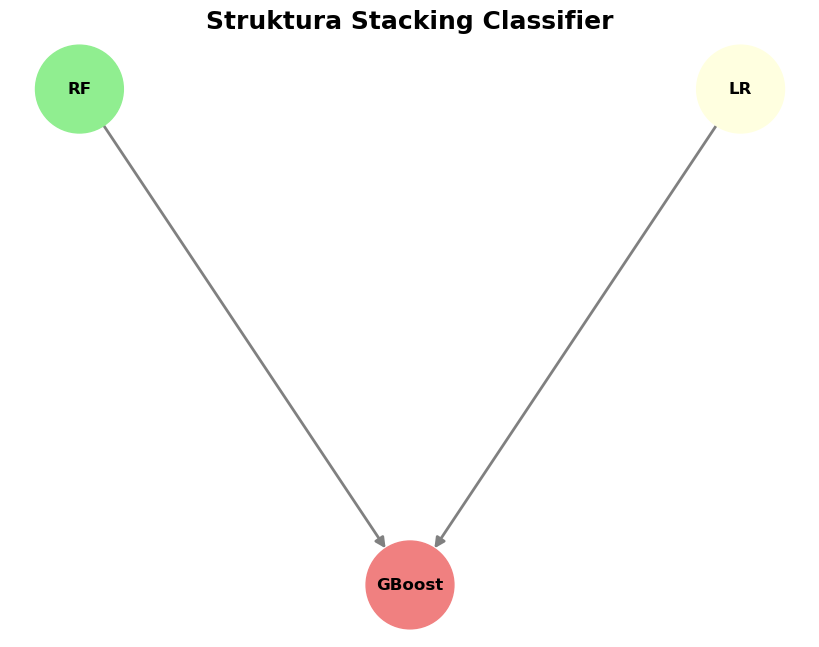

In [39]:
import matplotlib.pyplot as plt
import networkx as nx

# Tworzenie grafu
G = nx.DiGraph()

# Dodanie węzłów
G.add_node("RF", style="filled", fillcolor="lightgreen", shape="ellipse")
G.add_node("LR", style="filled", fillcolor="lightyellow", shape="ellipse")
G.add_node("GBoost", style="filled", fillcolor="lightcoral", shape="ellipse")

# Dodanie krawędzi
G.add_edges_from([
    ("RF", "GBoost"),
    ("LR", "GBoost")
])

# Ręczne ustawienie pozycji węzłów
pos = {
    "RF": (-0.3, 0.2),
    "LR": (0.3, 0.2),
    "GBoost": (0, 0)
}

# Rysowanie grafu
plt.figure(figsize=(8, 6))
nx.draw(
    G, pos, with_labels=True, 
    node_color=['lightgreen', 'lightyellow', 'lightcoral'],
    node_size=[4000 for node in G.nodes()],
    font_size=12, font_weight='bold', font_color="black", edge_color='gray', 
    arrowsize=15,  # Rozmiar strzałek
    width=2  # Grubość krawędzi
)

# Dodanie tytułu
plt.title("Struktura Stacking Classifier", fontsize=18, fontweight='bold')
plt.tight_layout()

# Zapisanie wykresu
plt.savefig("stacking_classifier_structure_without.png", dpi=300)
plt.show()
